# Getting started

Using a provided dataset, create a Linear Regression model and an executive summary write up based on your chosen scenario.

# 1) Your work must: Identify the problem

### Write a high quality problem statement

Problem Statement: A liquor store owner in Iowa is looking to expand to new locations and has hired you to investigate the market data for potential new locations. The business owner is interested in the details of the best model you can fit to the data so that his team can evaluate potential locations for a new storefront.

Describe the goals of your study and criteria for success

Goal: Build models of total sales based on location, price per bottle, total bottles sold. You may find it useful to build models for each county, zip code, or city.
Provide a table of the best performing stores by location type of your choice (city, county, or zip code) and the predictions of your model(s).

Based on your models and the table of data, recommend some general locations to the business owner, taking into account model performance. Validate your model's performance and ability to predict future sales using cross-validation.

Bonus: Recommend targets for volume sold and price per bottle!

# 2) Acquire the data

Obtain the data here -- it's from Iowa.gov, filtered and reduced a bit
There is a further reduced version that is 10% of the version above here

In [1]:
## Importing the packages that are needed for this project

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

# 3) Explore the data

### Import data using the Pandas Library

In [2]:
# Load the data into a DataFrame

file_name = ('/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-03/Assets/Iowa_Liquor_sales_sample_10pct.csv')

In [3]:
df = pd.read_csv(file_name)
df.head()

Date  Store Number         City Zip Code  County Number      County  \
0  11/04/2015          3717       SUMNER    50674            9.0      Bremer   
1  03/02/2016          2614    DAVENPORT    52807           82.0       Scott   
2  02/11/2016          2106  CEDAR FALLS    50613            7.0  Black Hawk   
3  02/03/2016          2501         AMES    50010           85.0       Story   
4  08/18/2015          3654      BELMOND    50421           99.0      Wright   

    Category              Category Name  Vendor Number  Item Number  \
0  1051100.0           APRICOT BRANDIES             55        54436   
1  1011100.0           BLENDED WHISKIES            395        27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES             65        19067   
3  1071100.0         AMERICAN COCKTAILS            395        59154   
4  1031080.0             VODKA 80 PROOF            297        35918   

            Item Description  Bottle Volume (ml) State Bottle Cost  \
0  Mr. Boston Apricot Brandy                 750             $4.50   
1                    Tin Cup                 750            $13.75   
2                   Jim Beam                1000            $12.59   
3    1800 Ultimate Margarita                1750             $9.50   
4         Five O'clock Vodka                1750             $7.20   

  State Bottle Retail  Bottles Sold Sale (Dollars)  Volume Sold (Liters)  \
0               $6.75            12         $81.00                   9.0   
1              $20.63             2         $41.26                   1.5   
2              $18.89            24        $453.36                  24.0   
3              $14.25             6         $85.50                  10.5   
4              $10.80            12        $129.60                  21.0   

   Volume Sold (Gallons)  
0                   2.38  
1                   0.40  
2                   6.34  
3                   2.77  
4                   5.55

### Perform exploratory analysis methods with visualization and statistical analysis

References: 
week-03/1.4-lab/code/solution-code

In [4]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [5]:
# Convert Date column to datetime type
#df['Date'] = pd.to_datetime(df['Date'], format ="%Y/%m/%d")
df['Date'] = pd.to_datetime(df['Date'], format ="%m/%d/%Y")

In [6]:
# Replaces all the $ in the dataset with a space
df_reg = df.replace({'\$': ''}, regex=True)

In [7]:
# Convert columns to float types
df_reg[['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']] = df_reg[['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']].astype(float) 

In [8]:
df_reg.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)              float64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [9]:
df_reg.describe()

Store Number  County Number      Category  Vendor Number  \
count  270955.000000  269878.000000  2.708870e+05   270955.00000   
mean     3590.263701      57.231642  1.043888e+06      256.43443   
std       947.662050      27.341205  5.018211e+04      141.01489   
min      2106.000000       1.000000  1.011100e+06       10.00000   
25%      2604.000000      31.000000  1.012200e+06      115.00000   
50%      3722.000000      62.000000  1.031200e+06      260.00000   
75%      4378.000000      77.000000  1.062310e+06      380.00000   
max      9023.000000      99.000000  1.701100e+06      978.00000   

         Item Number  Bottle Volume (ml)  State Bottle Cost  \
count  270955.000000       270955.000000      270955.000000   
mean    45974.963300          924.830341           9.773281   
std     52757.043086          493.088489           7.047119   
min       168.000000           50.000000           0.890000   
25%     26827.000000          750.000000           5.500000   
50%     38176.000000          750.000000           8.000000   
75%     64573.000000         1000.000000          11.920000   
max    995507.000000         6000.000000         425.000000   

       State Bottle Retail   Bottles Sold  Sale (Dollars)  \
count        270955.000000  270955.000000   270955.000000   
mean             14.675760       9.871285      128.902375   
std              10.570145      24.040912      383.027369   
min               1.340000       1.000000        1.340000   
25%               8.270000       2.000000       30.450000   
50%              12.270000       6.000000       70.560000   
75%              17.880000      12.000000      135.000000   
max             637.500000    2508.000000    36392.400000   

       Volume Sold (Liters)  Volume Sold (Gallons)  
count         270955.000000          270955.000000  
mean               8.981351               2.372830  
std               28.913690               7.638182  
min                0.100000               0.030000  
25%                1.500000               0.400000  
50%                5.250000               1.390000  
75%               10.500000               2.770000  
max             2508.000000             662.540000

In [10]:
df_reg.shape

(270955, 18)

In [11]:
df_drop = df_reg.dropna()

In [12]:
df_drop.count()

Date                     269258
Store Number             269258
City                     269258
Zip Code                 269258
County Number            269258
County                   269258
Category                 269258
Category Name            269258
Vendor Number            269258
Item Number              269258
Item Description         269258
Bottle Volume (ml)       269258
State Bottle Cost        269258
State Bottle Retail      269258
Bottles Sold             269258
Sale (Dollars)           269258
Volume Sold (Liters)     269258
Volume Sold (Gallons)    269258
dtype: int64

In [13]:
iowa_sample = df_drop.sample(frac=0.1)

In [14]:
iowa_sample

Date  Store Number             City Zip Code  County Number  \
215865 2015-11-16          4596       DES MOINES    50317           77.0   
225594 2015-12-08          2620  WINDSOR HEIGHTS    50311           77.0   
69466  2016-01-12          4559            OSAGE    50461           66.0   
244983 2015-03-02          2591         ATLANTIC    50022           15.0   
270951 2015-11-04          5151        IDA GROVE    51445           47.0   
252686 2015-06-08          4829       DES MOINES    50314           77.0   
130812 2015-06-03          2290       STORM LAKE    50588           11.0   
257015 2016-02-16          2629   COUNCIL BLUFFS    51503           78.0   
182824 2015-08-12          4481        IOWA CITY    52240           52.0   
69327  2015-09-16          2523      CENTERVILLE    52544            4.0   
5517   2015-05-11          4083           ANKENY    50021           77.0   
96361  2015-06-02          4450        URBANDALE    50323           77.0   
161583 2015-08-10          4874   MOUNT PLEASANT    52641           44.0   
208847 2015-05-11          2653       WASHINGTON    52353           92.0   
6986   2015-12-17          2571         WATERLOO    50703            7.0   
69465  2015-05-12          3705      ROCK RAPIDS    51246           60.0   
14792  2015-05-21          2671        JEFFERSON    50129           37.0   
30663  2015-06-08          4859       BURLINGTON    52601           29.0   
109039 2015-03-03          4489     CEDAR RAPIDS    52405           57.0   
6101   2015-12-01          4820           INWOOD    51240           60.0   
220488 2015-11-11          2200         SAC CITY    50583           81.0   
186868 2015-08-04          4235     WEBSTER CITY    50595           40.0   
105083 2015-06-22          3907        MUSCATINE    52761           70.0   
70487  2015-06-23          2620  WINDSOR HEIGHTS    50311           77.0   
126195 2015-04-09          2616          CLINTON    52732           23.0   
65103  2015-01-15          4969       CLEAR LAKE    50428           17.0   
153382 2015-11-18          3916          OTTUMWA    52501           90.0   
173621 2015-08-26          3773     CEDAR RAPIDS    52401           57.0   
59535  2015-05-07          2528       DES MOINES    50315           77.0   
42148  2015-12-07          2514           MARION    50129           57.0   
...           ...           ...              ...      ...            ...   
15108  2015-11-23          2642            PELLA    50219           63.0   
229125 2015-07-21          5068     ARNOLDS PARK    51331           30.0   
19053  2015-02-18          2603       BETTENDORF    52722           82.0   
258251 2016-02-24          2512        IOWA CITY    52240           52.0   
242095 2015-10-29          4988      CEDAR FALLS    50613            7.0   
207460 2016-03-17          2633       DES MOINES    50320           77.0   
204880 2015-04-13          2558   MOUNT PLEASANT    52641           44.0   
93187  2015-12-29          4129             AMES    50010           85.0   
14146  2015-01-07          3354        DAVENPORT    52807           82.0   
29522  2015-01-08          4429           COLFAX    50054           50.0   
227827 2015-11-12          4353       CLEAR LAKE    50248           17.0   
74705  2015-10-20          4820           INWOOD    51240           60.0   
245901 2015-03-18          2603       BETTENDORF    52722           82.0   
75498  2015-05-06          4463           GARNER    50438           41.0   
60182  2015-12-30          3670       CORALVILLE    52241           52.0   
67145  2015-12-16          3776        DAVENPORT    52806           82.0   
78210  2016-03-02          3857           WAUKON    52172            3.0   
42712  2016-02-23          4439     CENTER POINT    52213           57.0   
201879 2015-07-09          2627       DES MOINES    50310           77.0   
79895  2015-02-17          2607       SHENANDOAH    51601           73.0   
221621 2015-12-09          2603       BETTENDORF    52722    

In [15]:
iowa_sample.shape

(26926, 18)

In [16]:
iowa_sample.to_csv('Iowa_Liquor_sales_small.csv', index=False)

In [17]:
new_sample = pd.read_csv('Iowa_Liquor_sales_small.csv')

In [18]:
new_sample.shape

(26926, 18)

In [19]:
new_sample

Date  Store Number             City Zip Code  County Number  \
0      2015-11-16          4596       DES MOINES    50317           77.0   
1      2015-12-08          2620  WINDSOR HEIGHTS    50311           77.0   
2      2016-01-12          4559            OSAGE    50461           66.0   
3      2015-03-02          2591         ATLANTIC    50022           15.0   
4      2015-11-04          5151        IDA GROVE    51445           47.0   
5      2015-06-08          4829       DES MOINES    50314           77.0   
6      2015-06-03          2290       STORM LAKE    50588           11.0   
7      2016-02-16          2629   COUNCIL BLUFFS    51503           78.0   
8      2015-08-12          4481        IOWA CITY    52240           52.0   
9      2015-09-16          2523      CENTERVILLE    52544            4.0   
10     2015-05-11          4083           ANKENY    50021           77.0   
11     2015-06-02          4450        URBANDALE    50323           77.0   
12     2015-08-10          4874   MOUNT PLEASANT    52641           44.0   
13     2015-05-11          2653       WASHINGTON    52353           92.0   
14     2015-12-17          2571         WATERLOO    50703            7.0   
15     2015-05-12          3705      ROCK RAPIDS    51246           60.0   
16     2015-05-21          2671        JEFFERSON    50129           37.0   
17     2015-06-08          4859       BURLINGTON    52601           29.0   
18     2015-03-03          4489     CEDAR RAPIDS    52405           57.0   
19     2015-12-01          4820           INWOOD    51240           60.0   
20     2015-11-11          2200         SAC CITY    50583           81.0   
21     2015-08-04          4235     WEBSTER CITY    50595           40.0   
22     2015-06-22          3907        MUSCATINE    52761           70.0   
23     2015-06-23          2620  WINDSOR HEIGHTS    50311           77.0   
24     2015-04-09          2616          CLINTON    52732           23.0   
25     2015-01-15          4969       CLEAR LAKE    50428           17.0   
26     2015-11-18          3916          OTTUMWA    52501           90.0   
27     2015-08-26          3773     CEDAR RAPIDS    52401           57.0   
28     2015-05-07          2528       DES MOINES    50315           77.0   
29     2015-12-07          2514           MARION    50129           57.0   
...           ...           ...              ...      ...            ...   
26896  2015-11-23          2642            PELLA    50219           63.0   
26897  2015-07-21          5068     ARNOLDS PARK    51331           30.0   
26898  2015-02-18          2603       BETTENDORF    52722           82.0   
26899  2016-02-24          2512        IOWA CITY    52240           52.0   
26900  2015-10-29          4988      CEDAR FALLS    50613            7.0   
26901  2016-03-17          2633       DES MOINES    50320           77.0   
26902  2015-04-13          2558   MOUNT PLEASANT    52641           44.0   
26903  2015-12-29          4129             AMES    50010           85.0   
26904  2015-01-07          3354        DAVENPORT    52807           82.0   
26905  2015-01-08          4429           COLFAX    50054           50.0   
26906  2015-11-12          4353       CLEAR LAKE    50248           17.0   
26907  2015-10-20          4820           INWOOD    51240           60.0   
26908  2015-03-18          2603       BETTENDORF    52722           82.0   
26909  2015-05-06          4463           GARNER    50438           41.0   
26910  2015-12-30          3670       CORALVILLE    52241           52.0   
26911  2015-12-16          3776        DAVENPORT    52806           82.0   
26912  2016-03-02          3857           WAUKON    52172            3.0   
26913  2016-02-23          4439     CENTER POINT    52213           57.0   
26914  2015-07-09          2627       DES MOINES    50310           77.0   
26915  2015-02-17          2607       SHENANDOAH    51601           73.0   
26916  2015-12-09          2603       BETTENDORF    52722    

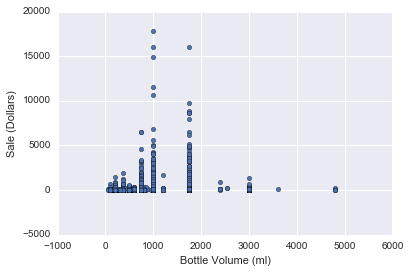

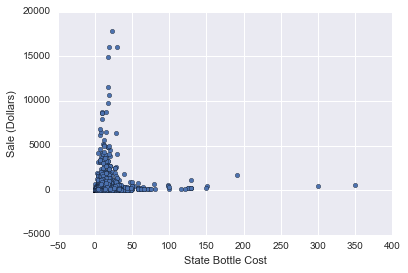

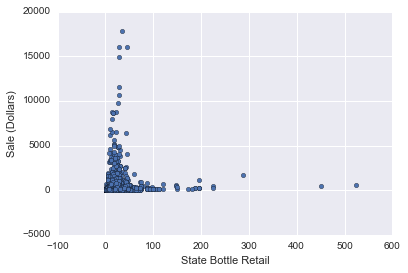

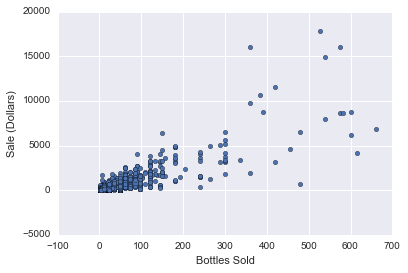

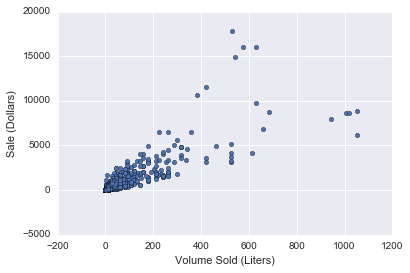

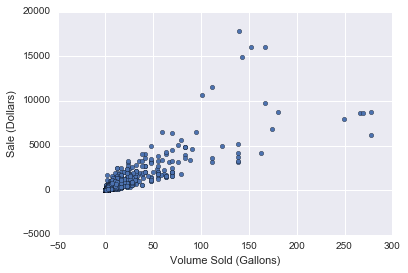

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

# There are many valid solutions.

# For the numerical variables
for column in ["Bottle Volume (ml)", "State Bottle Cost", "State Bottle Retail", "Bottles Sold", "Volume Sold (Liters)", "Volume Sold (Gallons)"]:
    new_sample.plot.scatter(x=column, y="Sale (Dollars)")

In [21]:
total_sales = new_sample['Sale (Dollars)'].groupby([new_sample['County'], new_sample['City'], new_sample['Zip Code'], new_sample['Store Number']]).agg({'Sale (Dollars)':sum})
Top_Sales = total_sales.sort_values(by='Sale (Dollars)', ascending = False)
Top_Sales.head(20)

Sale (Dollars)
County        City            Zip Code Store Number                
Polk          DES MOINES      50320    2633               100669.47
                              50314    4829                96118.82
Linn          CEDAR RAPIDS    52402    3385                48527.07
Johnson       IOWA CITY       52240    2512                47525.63
Woodbury      SIOUX CITY      51106    3447                45147.00
Polk          WINDSOR HEIGHTS 50311    3420                37794.54
Linn          CEDAR RAPIDS    52401    3773                33741.77
Scott         BETTENDORF      52722    3952                32433.29
Linn          MOUNT VERNON    52314    5102                28661.40
Polk          DES MOINES      50321    2561                27550.84
Johnson       CORALVILLE      52241    2670                27036.34
Scott         DAVENPORT       52804    2625                25969.78
Carroll       CARROLL         51401    2593                24617.39
Scott         DAVENPORT       52807    3354                23904.84
Dubuque       DUBUQUE         52001    4167                22326.57
Story         AMES            50010    3524                21205.08
Dallas        WEST DES MOINES 50266    3814                20511.72
Muscatine     MUSCATINE       52761    2573                20322.75
Pottawattamie COUNCIL BLUFFS  51501    3477                20269.32
Story         AMES            50010    2501                19135.87

In [22]:
Top_counties = pd.pivot_table(new_sample, index = ['County'], values = ['Sale (Dollars)'], aggfunc = sum)

In [23]:
Top10_Sales_County = Top_counties.sort_values(by='Sale (Dollars)', ascending = False)
Top10_Sales_County.head(10)

Sale (Dollars)
County                       
Polk                733330.95
Linn                309849.20
Scott               228407.84
Black Hawk          186317.79
Johnson             181826.49
Woodbury            143033.43
Pottawattamie       107693.80
Story               106169.43
Dubuque             104730.29
Cerro Gordo          74799.00

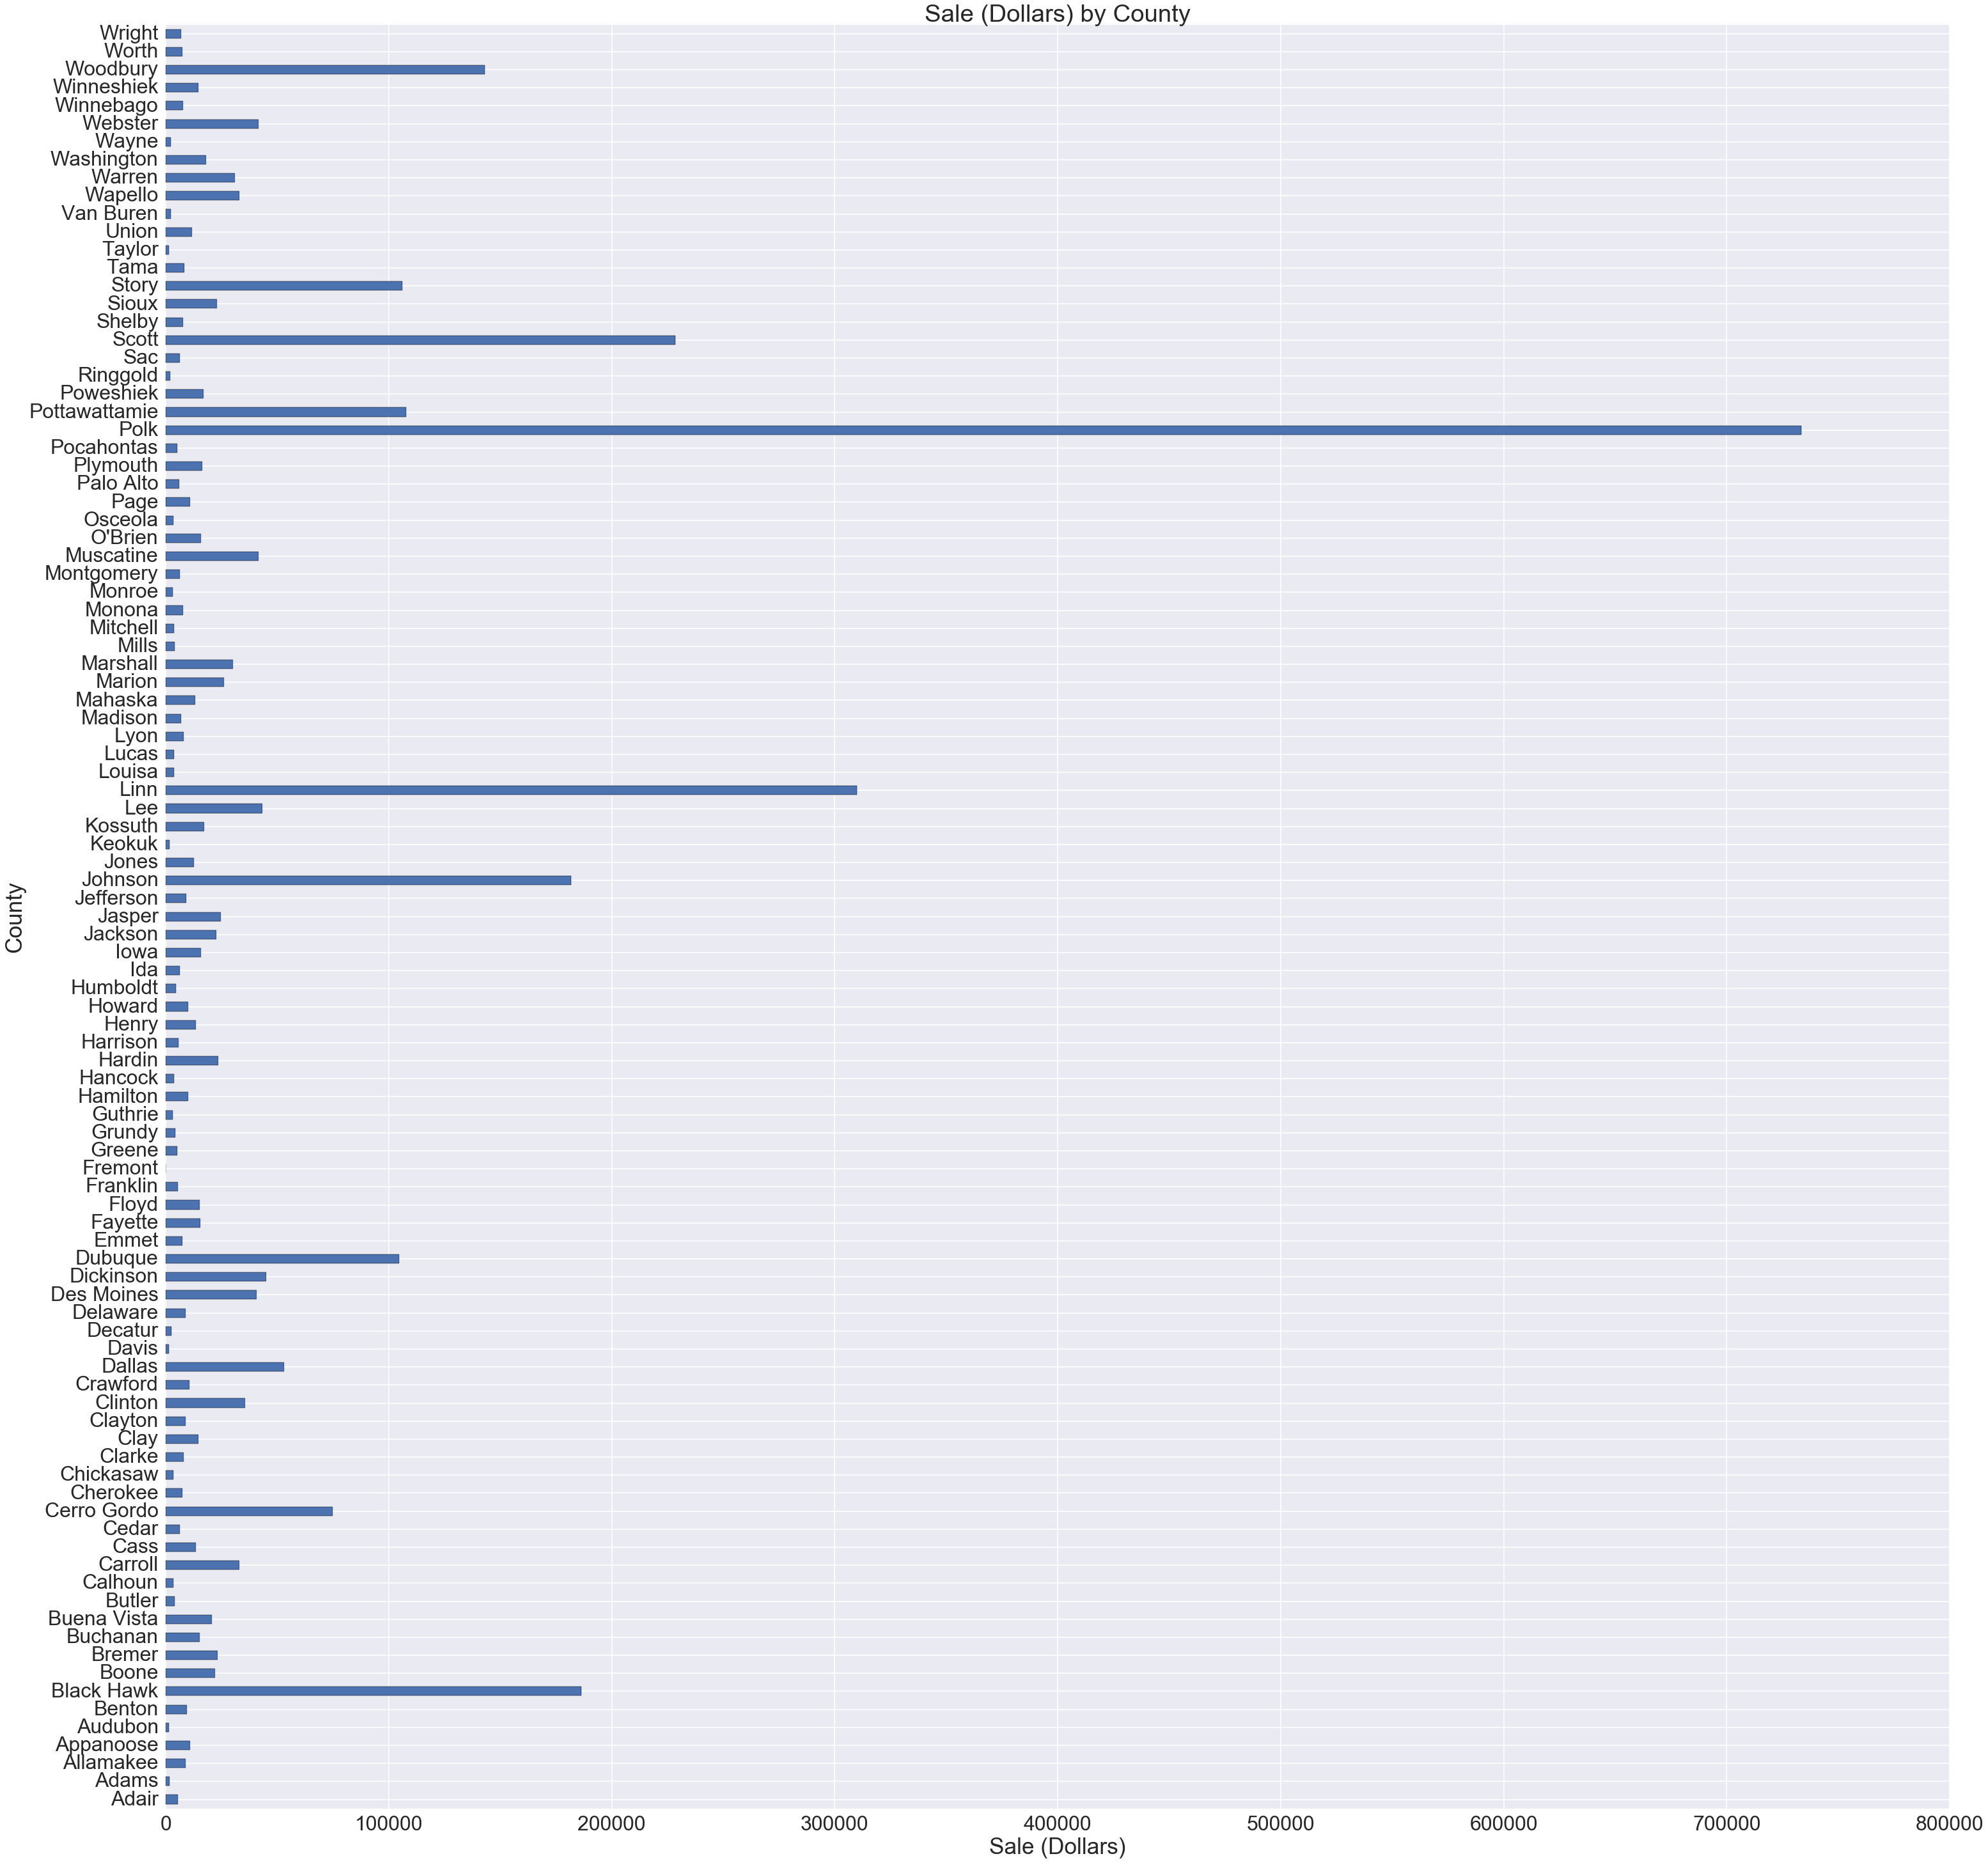

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use seaborn styles
sns.set_context("poster", font_scale=2)
plt.figure(figsize=(50,50))
new_sample.pivot_table('Sale (Dollars)', index='County', aggfunc=sum).plot(kind='barh')
plt.title('Sale (Dollars) by County')
plt.xlabel('Sale (Dollars)');
plt.ylabel('County');

#for p in ax.patches:
#        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [25]:
Top_cities = pd.pivot_table(new_sample, index = ['City'], values = ['Sale (Dollars)'], aggfunc = sum)

In [26]:
Top20_Sales_City = Top_cities.sort_values(by='Sale (Dollars)', ascending = False)
Top20_Sales_City.head(20)

Sale (Dollars)
City                           
DES MOINES            407613.13
CEDAR RAPIDS          239824.42
DAVENPORT             157742.94
SIOUX CITY            136819.15
WATERLOO              121372.75
IOWA CITY             117371.76
WEST DES MOINES       112629.89
COUNCIL BLUFFS        100525.35
AMES                   96603.92
DUBUQUE                96083.98
BETTENDORF             64633.45
CEDAR FALLS            60302.48
ANKENY                 59502.18
WINDSOR HEIGHTS        58653.33
MASON CITY             52677.39
FORT DODGE             46594.17
CORALVILLE             46566.84
MUSCATINE              39061.84
ALTOONA                31196.84
URBANDALE              31127.22

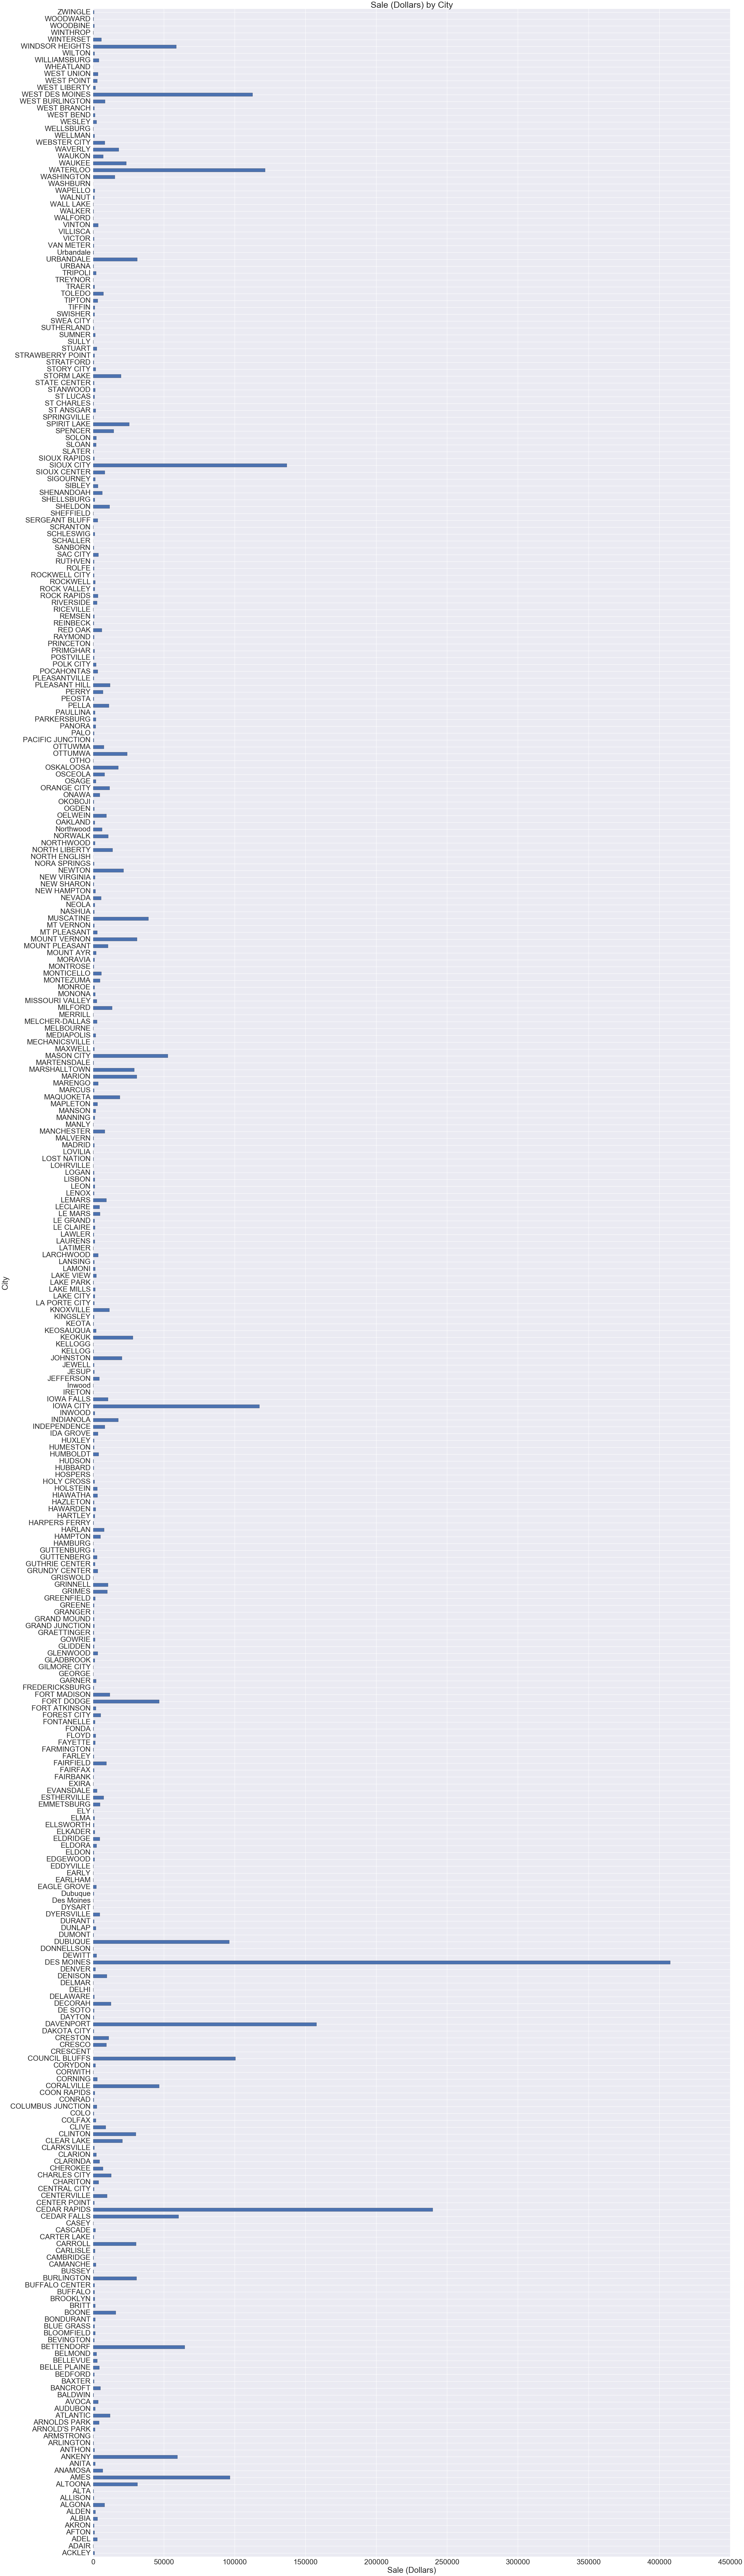

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use seaborn styles
sns.set_context("poster", font_scale=2)
plt.figure(figsize=(50,200))
new_sample.pivot_table('Sale (Dollars)', index='City', aggfunc=sum).plot(kind='barh')
plt.title('Sale (Dollars) by City')
plt.xlabel('Sale (Dollars)');
plt.ylabel('City');

#for p in ax.patches:
#        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [28]:
Top_zip_codes = pd.pivot_table(new_sample, index = ['Zip Code'], values = ['Sale (Dollars)'], aggfunc = sum)

In [29]:
Top20_Sales_Zip = Top_zip_codes.sort_values(by='Sale (Dollars)', ascending = False)
Top20_Sales_Zip.head(20)

Sale (Dollars)
Zip Code                
50314          119542.03
50320          110031.33
52402          106595.35
52240           98261.01
50010           91836.43
51106           70095.79
50311           66091.39
52722           64633.45
52001           61966.50
51501           61408.75
52807           59118.17
50613           58756.37
50266           57136.88
50265           55750.80
50401           52677.39
52804           49194.89
50501           46594.17
52241           46566.84
50317           45521.34
50702           45068.29

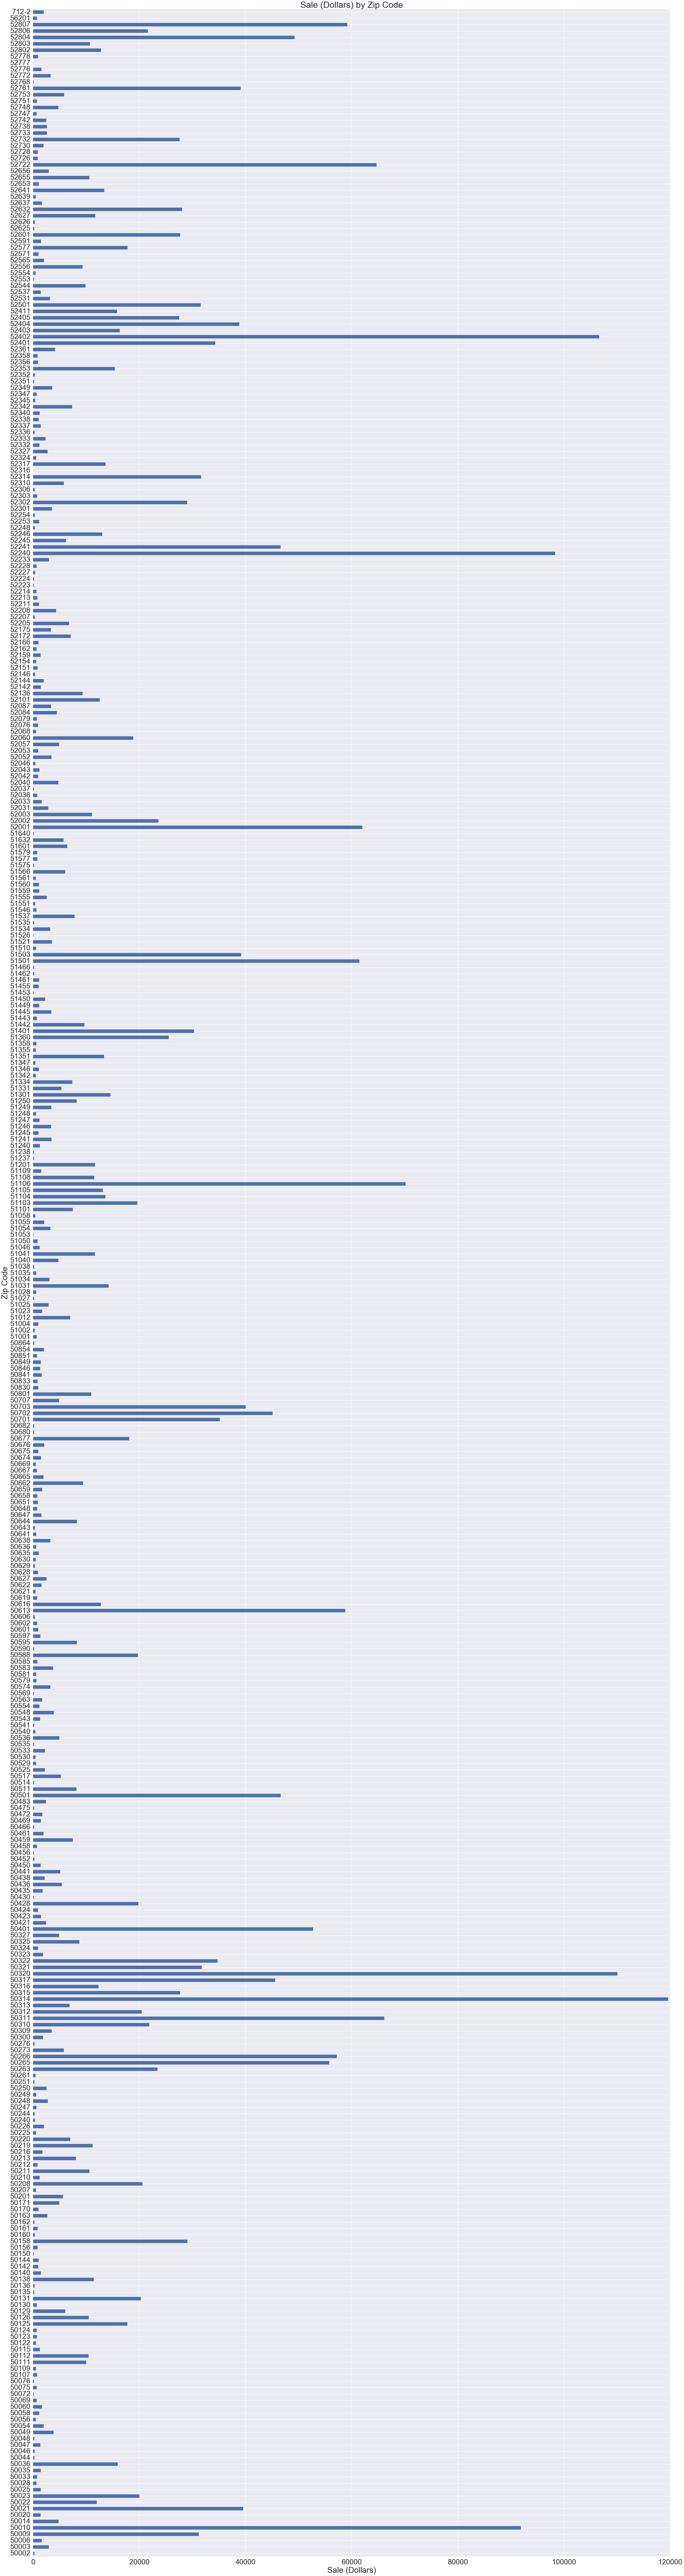

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use seaborn styles
sns.set_context("poster", font_scale=2)
plt.figure(figsize=(50,200))
new_sample.pivot_table('Sale (Dollars)', index='Zip Code', aggfunc=sum).plot(kind='barh')
plt.title('Sale (Dollars) by Zip Code')
plt.xlabel('Sale (Dollars)');
plt.ylabel('Zip Code');

#for p in ax.patches:
#        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### State the risks and assumptions of your data (Outside considerations that could skew or affect the data and make it not reliable)

There are many risks and assumptions that could affect or contribute to making this data unreliable. For example, I removed all the rows with NaN values in them assuming that they were not relevant, but by doing so, I reduced the original dataset. Another thing that I did was that I took a 10% sample of the dataset in order to better work with it. This could skew the data in any direction, meaning that some counties would appear higher although they might not be in the original dataset.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

### Create necessary derived columns from the data (i.e. creating new metrics like bottle per month, finding relationships between columns, daily average user/bottles per person/bottle per store)

In [31]:
# Remove redundant columns
del new_sample["Category Name"]
del new_sample["Item Number"]
del new_sample["County Number"]

In [32]:
new_sample

Date  Store Number             City Zip Code         County  \
0      2015-11-16          4596       DES MOINES    50317           Polk   
1      2015-12-08          2620  WINDSOR HEIGHTS    50311           Polk   
2      2016-01-12          4559            OSAGE    50461       Mitchell   
3      2015-03-02          2591         ATLANTIC    50022           Cass   
4      2015-11-04          5151        IDA GROVE    51445            Ida   
5      2015-06-08          4829       DES MOINES    50314           Polk   
6      2015-06-03          2290       STORM LAKE    50588    Buena Vista   
7      2016-02-16          2629   COUNCIL BLUFFS    51503  Pottawattamie   
8      2015-08-12          4481        IOWA CITY    52240        Johnson   
9      2015-09-16          2523      CENTERVILLE    52544      Appanoose   
10     2015-05-11          4083           ANKENY    50021           Polk   
11     2015-06-02          4450        URBANDALE    50323           Polk   
12     2015-08-10          4874   MOUNT PLEASANT    52641          Henry   
13     2015-05-11          2653       WASHINGTON    52353     Washington   
14     2015-12-17          2571         WATERLOO    50703     Black Hawk   
15     2015-05-12          3705      ROCK RAPIDS    51246           Lyon   
16     2015-05-21          2671        JEFFERSON    50129         Greene   
17     2015-06-08          4859       BURLINGTON    52601     Des Moines   
18     2015-03-03          4489     CEDAR RAPIDS    52405           Linn   
19     2015-12-01          4820           INWOOD    51240           Lyon   
20     2015-11-11          2200         SAC CITY    50583            Sac   
21     2015-08-04          4235     WEBSTER CITY    50595       Hamilton   
22     2015-06-22          3907        MUSCATINE    52761      Muscatine   
23     2015-06-23          2620  WINDSOR HEIGHTS    50311           Polk   
24     2015-04-09          2616          CLINTON    52732        Clinton   
25     2015-01-15          4969       CLEAR LAKE    50428    Cerro Gordo   
26     2015-11-18          3916          OTTUMWA    52501        Wapello   
27     2015-08-26          3773     CEDAR RAPIDS    52401           Linn   
28     2015-05-07          2528       DES MOINES    50315           Polk   
29     2015-12-07          2514           MARION    50129           Linn   
...           ...           ...              ...      ...            ...   
26896  2015-11-23          2642            PELLA    50219         Marion   
26897  2015-07-21          5068     ARNOLDS PARK    51331      Dickinson   
26898  2015-02-18          2603       BETTENDORF    52722          Scott   
26899  2016-02-24          2512        IOWA CITY    52240        Johnson   
26900  2015-10-29          4988      CEDAR FALLS    50613     Black Hawk   
26901  2016-03-17          2633       DES MOINES    50320           Polk   
26902  2015-04-13          2558   MOUNT PLEASANT    52641          Henry   
26903  2015-12-29          4129             AMES    50010          Story   
26904  2015-01-07          3354        DAVENPORT    52807          Scott   
26905  2015-01-08          4429           COLFAX    50054         Jasper   
26906  2015-11-12          4353       CLEAR LAKE    50248    Cerro Gordo   
26907  2015-10-20          4820           INWOOD    51240           Lyon   
26908  2015-03-18          2603       BETTENDORF    52722          Scott   
26909  2015-05-06          4463           GARNER    50438        Hancock   
26910  2015-12-30          3670       CORALVILLE    52241        Johnson   
26911  2015-12-16          3776        DAVENPORT    52806          Scott   
26912  2016-03-02          3857           WAUKON    52172      Allamakee   
26913  2016-02-23          4439     CENTER POINT    52213           Linn   
26914  2015-07-09          2627       DES MOINES    50310           Polk   
26915  2015-02-17          2607       SHENANDOAH    51601           Page   
26916  2015-12-09          2603       BETTENDORF    52722    

### Format, clean, slice, and combine the data in Python (Put everything together)

Note: Most of the cleaning was done previously in the Explore the Data section under "Perform exploratory analysis and visualizations"

In [33]:
new_sample.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County                    object
Category                 float64
Vendor Number              int64
Item Description          object
Bottle Volume (ml)       float64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [34]:
new_sample['Date'] = pd.to_datetime(new_sample['Date'], format ="%Y/%m/%d")

In [35]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = new_sample.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling
lower_cutoff = pd.Timestamp("20150101")
upper_cutoff = pd.Timestamp("20151231")
mask = (dates['Date amin'] >= lower_cutoff) & (dates['Date amax'] <= upper_cutoff)
good_stores = dates[mask]["Store Number"]
new_sample1 = new_sample[new_sample["Store Number"].isin(good_stores)]

In [36]:
new_sample1

Date  Store Number            City Zip Code         County  \
17    2015-06-08          4859      BURLINGTON    52601     Des Moines   
18    2015-03-03          4489    CEDAR RAPIDS    52405           Linn   
19    2015-12-01          4820          INWOOD    51240           Lyon   
33    2015-05-06          3682          WESLEY    50483        Kossuth   
58    2015-03-23          5078  COUNCIL BLUFFS    51501  Pottawattamie   
60    2015-07-14          5104   ARNOLD'S PARK    51331      Dickinson   
67    2015-04-06          2487         ANAMOSA    52205          Jones   
79    2015-11-10          4937      SHENANDOAH    51601           Page   
128   2015-03-26          4369         NORWALK    50211         Warren   
136   2015-07-07          2205        CLARINDA    51632           Page   
162   2015-08-17          2487         ANAMOSA    52205          Jones   
186   2015-02-04          4349      DES MOINES    50315           Polk   
193   2015-09-08          5168    CEDAR RAPIDS    52402           Linn   
199   2015-03-18          2954      DES MOINES    50300           Polk   
204   2015-06-08          2487         ANAMOSA    52205          Jones   
255   2015-10-15          4380     WEST BRANCH    52358          Cedar   
258   2015-01-12          3690        WATERLOO    50702     Black Hawk   
302   2015-05-26          4322          BAXTER    50028         Jasper   
308   2015-08-17          2847          MARION    52302           Linn   
349   2015-01-06          2205        CLARINDA    51632           Page   
382   2015-04-22          2238         ALTOONA    50009           Polk   
421   2015-01-05          2963           CLIVE    50325           Polk   
430   2015-01-22          3437         NORWALK    50211         Warren   
436   2015-05-18          4543          MARION    52302           Linn   
437   2015-07-29          4735         OTTUMWA    52501        Wapello   
448   2015-07-30          9002        LECLAIRE    52753          Scott   
525   2015-09-21          4926      DES MOINES    50322           Polk   
584   2015-04-14          4937      SHENANDOAH    51601           Page   
600   2015-01-15          2953      DES MOINES    50316           Polk   
642   2015-01-05          3882       DAVENPORT    52802          Scott   
...          ...           ...             ...      ...            ...   
26527 2015-01-13          4411         DE SOTO    50069         Dallas   
26529 2015-04-07          3529        CHEROKEE    51012       Cherokee   
26569 2015-03-26          4369         NORWALK    50211         Warren   
26604 2015-05-12          5036    CEDAR RAPIDS    52402           Linn   
26613 2015-12-02          5186      WEST UNION    52175        Fayette   
26619 2015-10-26          4722      BURLINGTON    56201     Des Moines   
26622 2015-01-20          4901       POLK CITY    50226           Polk   
26624 2015-01-21          4846           ONAWA    51040         Monona   
26633 2015-08-19          5147          VICTOR    52347      Poweshiek   
26647 2015-02-02          2460         HAMPTON    50441       Franklin   
26655 2015-09-21          4169      DES MOINES    50317           Polk   
26669 2015-04-28          4524    NORA SPRINGS    50458          Floyd   
26678 2015-09-01          3576         HARTLEY    51346        O'Brien   
26686 2015-08-17          5171        DELAWARE    52036       Delaware   
26704 2015-03-24          4712         DUBUQUE    52001        Dubuque   
26729 2015-10-28          3970          NEVADA    50201          Story   
26738 2015-12-10          2836        WATERLOO    50703     Black Hawk   
26767 2015-10-26          4621         MAXWELL    50161          Story   
26806 2015-06-02          4538     CLARKSVILLE    50619         Butler   
26820 2015-04-20          5075      NEW SHARON    50207        Mahaska   
26821 2015-11-02          2460         HAMPTON    50441       Franklin   
26823 2015-08-19          4432      CORALVILLE    52241        Johnson   
26827 2015-01-26

In [37]:
# Margin
new_sample["Margin"] = (new_sample["State Bottle Retail"] - new_sample["State Bottle Cost"]) * new_sample["Bottles Sold"]
new_sample["Price per Liter"] = new_sample["Sale (Dollars)"] / new_sample["Volume Sold (Liters)"]
new_sample.head()

Date  Store Number             City Zip Code    County   Category  \
0 2015-11-16          4596       DES MOINES    50317      Polk  1031200.0   
1 2015-12-08          2620  WINDSOR HEIGHTS    50311      Polk  1012210.0   
2 2016-01-12          4559            OSAGE    50461  Mitchell  1081900.0   
3 2015-03-02          2591         ATLANTIC    50022      Cass  1081200.0   
4 2015-11-04          5151        IDA GROVE    51445       Ida  1011200.0   

   Vendor Number             Item Description  Bottle Volume (ml)  \
0            205          New Amsterdam Peach               375.0   
1            370  Glenlivet 12 Yr Malt Scotch               750.0   
2            259         Christian Bros Honey               750.0   
3            305      Tippy Cow Shamrock Mint               750.0   
4            259    Evan Williams Str Bourbon               750.0   

   State Bottle Cost  State Bottle Retail  Bottles Sold  Sale (Dollars)  \
0               3.50                 5.25             6           31.50   
1              22.98                34.47             2           68.94   
2               5.43                 8.15             1            8.15   
3              10.00                15.00             6           90.00   
4               7.47                11.21             3           33.63   

   Volume Sold (Liters)  Volume Sold (Gallons)  Margin  Price per Liter  
0                  2.25                   0.59   10.50        14.000000  
1                  1.50                   0.40   22.98        45.960000  
2                  0.75                   0.20    2.72        10.866667  
3                  4.50                   1.19   30.00        20.000000  
4                  2.25                   0.59   11.22        14.946667

In [38]:
# Sales per store, 2015

# Filter by our start and end dates
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
sales = new_sample[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns
sales.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County',
       u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# Quick check
sales.head()

Store Number         City  2015 Sales  2015 Sales mean     County  \
0          2106  CEDAR FALLS    10039.44       223.098667  15.019513   
1          2113       GOWRIE     1119.69        86.130000  15.533773   
2          2130     WATERLOO     9428.37       235.709250  16.784967   
3          2152     ROCKWELL     1336.83       102.833077  14.937766   
4          2178       WAUKON     2277.31       133.959412  14.864230   

  Price per Liter mean     Zip Code  2015 Volume Sold (Liters)  \
0                50613   Black Hawk                     820.50   
1                50543      Webster                      69.75   
2                50703   Black Hawk                     472.87   
3                50469  Cerro Gordo                      88.00   
4                52172    Allamakee                     204.10   

   2015 Volume Sold (Liters) mean  2015 Margin mean  
0                       18.233333         74.877333  
1                        5.365385         28.720769  
2                       11.821750         78.584250  
3                        6.769231         34.706923  
4                       12.005882         46.371176

In [39]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample2 = new_sample[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q1"] = new_sample2["Sale (Dollars)"]

# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20161231")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample2 = new_sample[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2016 Sales Q1"] = new_sample2["Sale (Dollars)"]

sales.head()

Store Number         City  2015 Sales  2015 Sales mean     County  \
0          2106  CEDAR FALLS    10039.44       223.098667  15.019513   
1          2113       GOWRIE     1119.69        86.130000  15.533773   
2          2130     WATERLOO     9428.37       235.709250  16.784967   
3          2152     ROCKWELL     1336.83       102.833077  14.937766   
4          2178       WAUKON     2277.31       133.959412  14.864230   

  Price per Liter mean     Zip Code  2015 Volume Sold (Liters)  \
0                50613   Black Hawk                     820.50   
1                50543      Webster                      69.75   
2                50703   Black Hawk                     472.87   
3                50469  Cerro Gordo                      88.00   
4                52172    Allamakee                     204.10   

   2015 Volume Sold (Liters) mean  2015 Margin mean  2015 Sales Q1  \
0                       18.233333         74.877333        1160.10   
1                        5.365385         28.720769         138.00   
2                       11.821750         78.584250         604.08   
3                        6.769231         34.706923         322.20   
4                       12.005882         46.371176         385.92   

   2016 Sales Q1  
0        4005.12  
1         175.00  
2         919.32  
3          84.33  
4         581.72

(0, 50000)

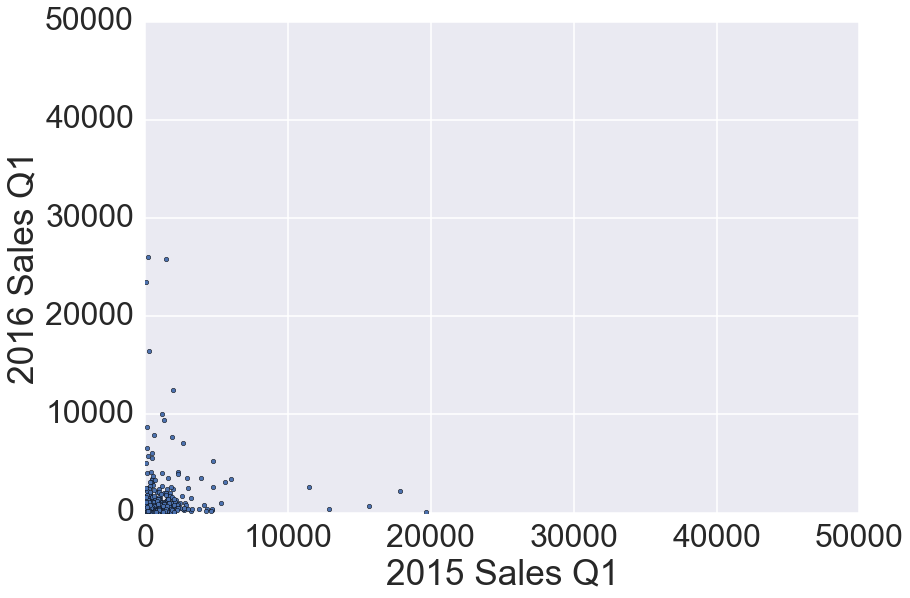

In [40]:
# Quick plot to check the computations
sales.plot(kind='scatter', x="2015 Sales Q1", y="2016 Sales Q1");
plt.xlim(0, 50000)
plt.ylim(0, 50000)

In [41]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q2-Q4
start_date1 = pd.Timestamp("20150401")
end_date1 = pd.Timestamp("20151231")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask1 = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample4 = new_sample[mask1].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Total Sales"] = new_sample4["Sale (Dollars)"]

# Sales 2016 Q2-Q4
start_date1 = pd.Timestamp("20160401")
end_date1 = pd.Timestamp("20161231")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask1 = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample4 = new_sample[mask1].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2016 Total Sales"] = new_sample4["Sale (Dollars)"]

sales.head()

Store Number         City  2015 Sales  2015 Sales mean     County  \
0          2106  CEDAR FALLS    10039.44       223.098667  15.019513   
1          2113       GOWRIE     1119.69        86.130000  15.533773   
2          2130     WATERLOO     9428.37       235.709250  16.784967   
3          2152     ROCKWELL     1336.83       102.833077  14.937766   
4          2178       WAUKON     2277.31       133.959412  14.864230   

  Price per Liter mean     Zip Code  2015 Volume Sold (Liters)  \
0                50613   Black Hawk                     820.50   
1                50543      Webster                      69.75   
2                50703   Black Hawk                     472.87   
3                50469  Cerro Gordo                      88.00   
4                52172    Allamakee                     204.10   

   2015 Volume Sold (Liters) mean  2015 Margin mean  2015 Sales Q1  \
0                       18.233333         74.877333        1160.10   
1                        5.365385         28.720769         138.00   
2                       11.821750         78.584250         604.08   
3                        6.769231         34.706923         322.20   
4                       12.005882         46.371176         385.92   

   2016 Sales Q1  2015 Total Sales  2016 Total Sales  
0        4005.12           4005.12           4005.12  
1         175.00            175.00            175.00  
2         919.32            919.32            919.32  
3          84.33             84.33             84.33  
4         581.72            581.72            581.72

(0, 50000)

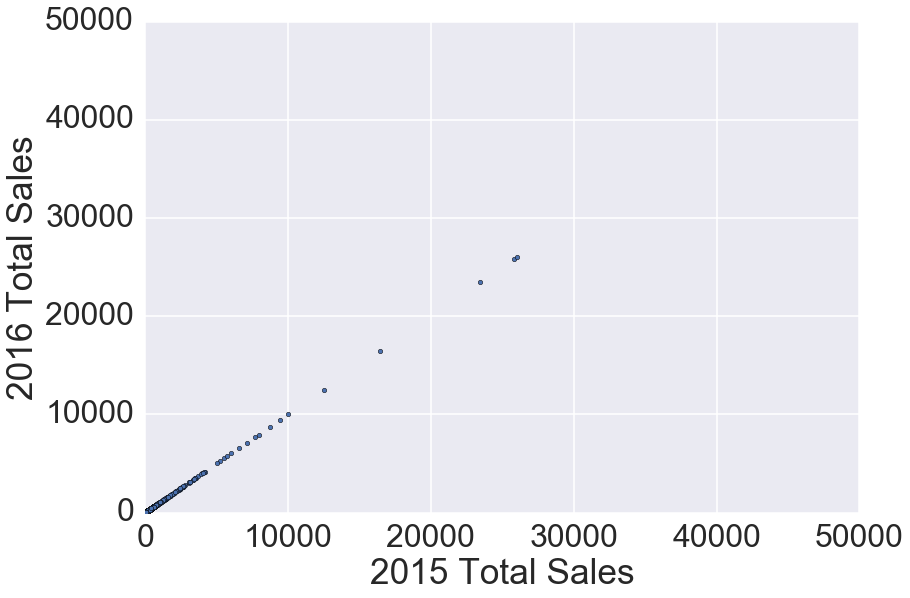

In [42]:
# Quick plot to check the computations
sales.plot(kind='scatter', x="2015 Total Sales", y="2016 Total Sales");
plt.xlim(0, 50000)
plt.ylim(0, 50000)

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

### Determine outliers, skew distribution of important variables (if any) (scipy.stats.skew)

In [43]:
# load numpy and pandas for data manipulation
# Link: https://www.datarobot.com/blog/ordinary-least-squares-in-python/
# b = (X'X)^-1(X'Y) Note: OLS Regression; see theta function below

import pandas as pd
import numpy as np
from scipy import linalg

# load statsmodels as alias ``sm``
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

In [44]:
new_sample.head()

Date  Store Number         City Zip Code      County   Category  \
18615 2015-01-08          2106  CEDAR FALLS    50613  Black Hawk  1062310.0   
24537 2015-01-08          2106  CEDAR FALLS    50613  Black Hawk  1062200.0   
22580 2015-01-22          2106  CEDAR FALLS    50613  Black Hawk  1041100.0   
6169  2015-02-12          2106  CEDAR FALLS    50613  Black Hawk  1011200.0   
12848 2015-03-12          2106  CEDAR FALLS    50613  Black Hawk  1081200.0   

       Vendor Number           Item Description  Bottle Volume (ml)  \
18615            259  Admiral Nelson Spiced Rum               750.0   
24537             35       Bacardi Superior Rum              1000.0   
22580            434                Hawkeye Gin              1000.0   
6169              55    Kentucky Tavern Bourbon               750.0   
12848            330       Ryan's Cream Liqueur              1000.0   

       State Bottle Cost  State Bottle Retail  Bottles Sold  Sale (Dollars)  \
18615               5.78                 8.67            12          104.04   
24537               9.50                14.25            36          513.00   
22580               4.23                 6.35            12           76.20   
6169                4.14                 6.21            12           74.52   
12848               7.23                10.85            12          130.20   

       Volume Sold (Liters)  Volume Sold (Gallons)  Margin  Price per Liter  
18615                   9.0                   2.38   34.68            11.56  
24537                  36.0                   9.51  171.00            14.25  
22580                  12.0                   3.17   25.44             6.35  
6169                    9.0                   2.38   24.84             8.28  
12848                  12.0                   3.17   43.44            10.85

In [45]:
y = new_sample['Sale (Dollars)']

In [46]:
X = new_sample.Margin

In [47]:
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const  Margin
18615    1.0   34.68
24537    1.0  171.00
22580    1.0   25.44
6169     1.0   24.84
12848    1.0   43.44

In [48]:
theta = linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # X.T: Transpose of the matrix (i.e. 3x2 Matrix
# becomes 2x3 Matrix)
# For the Matrix to be inverted it has to be squared (i.e. 3x2 multiplied by 2x3 is a 3x3 or a
# square matrix)
theta

array([ 0.42466775,  2.98147391])

In [49]:
est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.200e+07
Date:                Sun, 26 Jun 2016   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -87669.
No. Observations:               26926   AIC:                         1.753e+05
Df Residuals:                   26924   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4247      0.041     10.457      0.000         0.345     0.504
Margin         2.9815      0.000   9055.247      0.000         2.981     2.982
==============================================================================
Omnibus:                    90310.309   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      24288575161.275
Skew:                         -60.015   Prob(JB):                         0.00
Kurtosis:                    4654.319   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
est.predict(X)

array([ 103.82218294,  510.25670634,   76.27336402, ...,  303.10389908,
        215.09078926,  107.7577285 ])

In [51]:
est.params

const     0.424668
Margin    2.981474
dtype: float64

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


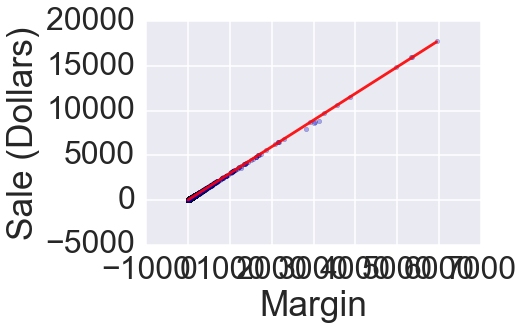

In [52]:
# Make sure that graphics appear inline in the iPython notebook
%pylab inline

# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.Margin.min(), X.Margin.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X.Margin, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Margin")
plt.ylabel("Sale (Dollars)")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red
# Populating the interactive namespace from numpy and matplotlib

### Determine correlations / causations in the data

In [53]:
sales.corr()

Store Number  2015 Sales  2015 Sales mean  \
Store Number                        1.000000   -0.387098        -0.047801   
2015 Sales                         -0.387098    1.000000         0.443052   
2015 Sales mean                    -0.047801    0.443052         1.000000   
County                              0.051501    0.092671         0.102238   
2015 Volume Sold (Liters)          -0.418501    0.980988         0.428722   
2015 Volume Sold (Liters) mean     -0.068464    0.355068         0.859588   
2015 Margin mean                   -0.047933    0.441740         0.999818   
2015 Sales Q1                      -0.299188    0.285265         0.061887   
2016 Sales Q1                      -0.264441    0.157463         0.026887   
2015 Total Sales                   -0.264441    0.157463         0.026887   
2016 Total Sales                   -0.264441    0.157463         0.026887   

                                  County  2015 Volume Sold (Liters)  \
Store Number                    0.051501                  -0.418501   
2015 Sales                      0.092671                   0.980988   
2015 Sales mean                 0.102238                   0.428722   
County                          1.000000                   0.045127   
2015 Volume Sold (Liters)       0.045127                   1.000000   
2015 Volume Sold (Liters) mean -0.184704                   0.403169   
2015 Margin mean                0.100077                   0.428539   
2015 Sales Q1                   0.000275                   0.313525   
2016 Sales Q1                  -0.011721                   0.166680   
2015 Total Sales               -0.011721                   0.166680   
2016 Total Sales               -0.011721                   0.166680   

                                2015 Volume Sold (Liters) mean  \
Store Number                                         -0.068464   
2015 Sales                                            0.355068   
2015 Sales mean                                       0.859588   
County                                               -0.184704   
2015 Volume Sold (Liters)                             0.403169   
2015 Volume Sold (Liters) mean                        1.000000   
2015 Margin mean                                      0.863850   
2015 Sales Q1                                         0.068221   
2016 Sales Q1                                         0.024821   
2015 Total Sales                                      0.024821   
2016 Total Sales                                      0.024821   

                                2015 Margin mean  2015 Sales Q1  \
Store Number                           -0.047933      -0.299188   
2015 Sales                              0.441740       0.285265   
2015 Sales mean                         0.999818       0.061887   
County                                  0.100077       0.000275   
2015 Volume Sold (Liters)               0.428539       0.313525   
2015 Volume Sold (Liters) mean          0.863850       0.068221   
2015 Margin mean                        1.000000       0.061423   
2015 Sales Q1                           0.061423       1.000000   
2016 Sales Q1                           0.026650       0.107320   
2015 Total Sales                        0.026650       0.107320   
2016 Total Sales                        0.026650       0.107320   

                                2016 Sales Q1  2015 Total Sales  \
Store Number                        -0.264441         -0.264441   
2015 Sales                           0.157463          0.157463   
2015 Sales mean                      0.026887          0.026887   
County                              -0.011721         -0.011721   
2015 Volume Sold (Liters)            0.166680          0.166680   
2015 Volume Sold (Liters) mean       0.024821          0.024821   
2015 Margin mean                     0.026650          0.026650   
2015 Sales Q1                        0.107320          0.107320   
2016 Sales Q1                        1.000000        

### Validate findings using statistical analysis (p-values, confidence intervals) as applicable (possibly use statsmodels, scipy, numpy, scikit learn)

In [54]:
xs = new_sample['Sale (Dollars)']
ys = [x*x + 1 for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

[10825.321600000001, 263170.0, 5807.4400000000005, 5554.2303999999995, 16953.039999999997, 35790.072400000005, 5324.1615999999995, 525336.03999999992, 27743.2336, 72836.214399999997, 14286.0304, 96746.881600000008, 59108.3344, 32401.0, 30193.537599999996, 8101.0, 29242.0, 9102.1600000000017, 156817.0, 12860.560000000001, 26245.0, 35495.560000000005, 54757.0, 4200.04, 236197.0, 82945.0, 18813.865599999997, 3687.9184, 8874.6400000000012, 7465.9600000000009, 72901.0, 228102.76000000001, 82668.75039999999, 128308.23999999999, 74726.689600000012, 54757.0, 5644.0144000000009, 13690.0, 18813.865599999997, 24637.441600000002, 202501.0, 54757.0, 8874.6400000000012, 4979.7136, 620157.25, 4475764.3599999994, 205536.28960000002, 54532.590400000008, 15041.569600000001, 627265.0, 82945.0, 9802.0, 1522.0, 12242.2096, 200.65690000000004, 490.73689999999993, 5973.1984000000002, 170.5204, 109456.10559999998, 850.13960000000009, 473.62759999999992, 216.50239999999999, 298.5625, 109456.10559999998, 6931.5

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 1.37272619965e+13
MAE: 135140.985935


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [141]:
# load numpy and pandas for data manipulation
# Link: https://www.datarobot.com/blog/ordinary-least-squares-in-python/
# b = (X'X)^-1(X'Y) Note: OLS Regression; see theta function below

import pandas as pd
import numpy as np
from scipy import linalg

# load statsmodels as alias ``sm``
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

In [142]:
new_sample.head()

Date  Store Number         City Zip Code      County   Category  \
18615 2015-01-08          2106  CEDAR FALLS    50613  Black Hawk  1062310.0   
24537 2015-01-08          2106  CEDAR FALLS    50613  Black Hawk  1062200.0   
22580 2015-01-22          2106  CEDAR FALLS    50613  Black Hawk  1041100.0   
6169  2015-02-12          2106  CEDAR FALLS    50613  Black Hawk  1011200.0   
12848 2015-03-12          2106  CEDAR FALLS    50613  Black Hawk  1081200.0   

       Vendor Number           Item Description  Bottle Volume (ml)  \
18615            259  Admiral Nelson Spiced Rum               750.0   
24537             35       Bacardi Superior Rum              1000.0   
22580            434                Hawkeye Gin              1000.0   
6169              55    Kentucky Tavern Bourbon               750.0   
12848            330       Ryan's Cream Liqueur              1000.0   

       State Bottle Cost  State Bottle Retail  Bottles Sold  Sale (Dollars)  \
18615               5.78                 8.67            12          104.04   
24537               9.50                14.25            36          513.00   
22580               4.23                 6.35            12           76.20   
6169                4.14                 6.21            12           74.52   
12848               7.23                10.85            12          130.20   

       Volume Sold (Liters)  Volume Sold (Gallons)  Margin  Price per Liter  
18615                   9.0                   2.38   34.68            11.56  
24537                  36.0                   9.51  171.00            14.25  
22580                  12.0                   3.17   25.44             6.35  
6169                    9.0                   2.38   24.84             8.28  
12848                  12.0                   3.17   43.44            10.85

In [156]:
y = new_sample['Bottles Sold']

In [157]:
X = new_sample.Margin

In [158]:
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

const  Margin
18615    1.0   34.68
24537    1.0  171.00
22580    1.0   25.44
6169     1.0   24.84
12848    1.0   43.44

### Complete linear regressions using scikit-learn or statsmodels and interpret your findings

In [159]:
theta = linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # X.T: Transpose of the matrix (i.e. 3x2 Matrix
# becomes 2x3 Matrix)
# For the Matrix to be inverted it has to be squared (i.e. 3x2 multiplied by 2x3 is a 3x3 or a
# square matrix)
theta

array([ 3.78906552,  0.140559  ])

In [160]:
est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Bottles Sold   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 5.649e+04
Date:                Sun, 26 Jun 2016   Prob (F-statistic):               0.00
Time:                        18:21:35   Log-Likelihood:            -1.0344e+05
No. Observations:               26926   AIC:                         2.069e+05
Df Residuals:                   26924   BIC:                         2.069e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.7891      0.073     51.944      0.000         3.646     3.932
Margin         0.1406      0.001    237.679      0.000         0.139     0.142
==============================================================================
Omnibus:                    39850.666   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        151304355.828
Skew:                           8.178   Prob(JB):                         0.00
Kurtosis:                     369.872   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
est.predict(X)

array([  8.66365152,  27.82465389,   7.36488639, ...,  18.05861483,
        13.90931326,   8.84918939])

In [162]:
est.params

const     3.789066
Margin    0.140559
dtype: float64

Populating the interactive namespace from numpy and matplotlib


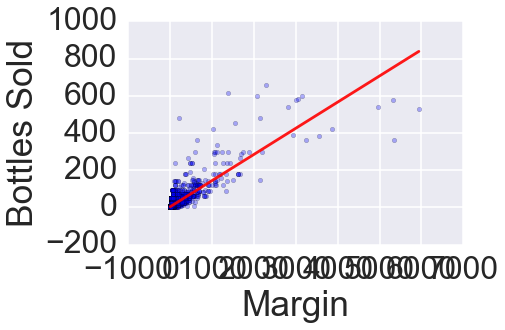

In [163]:
# Make sure that graphics appear inline in the iPython notebook
%pylab inline

# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.Margin.min(), X.Margin.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X.Margin, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Margin")
plt.ylabel("Bottles Sold")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red
# Populating the interactive namespace from numpy and matplotlib

### Calculate and plot predicted probabilities and/or present tables of results

In [165]:
xs = new_sample['Bottles Sold']
ys = [x*x + 1 for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

[145, 1297, 145, 145, 145, 37, 145, 14401, 145, 145, 145, 2305, 577, 145, 145, 145, 145, 145, 3601, 145, 145, 577, 145, 37, 145, 577, 145, 145, 145, 145, 145, 2305, 145, 1297, 577, 145, 145, 145, 145, 577, 577, 145, 145, 145, 901, 14401, 577, 145, 145, 2305, 577, 145, 17, 577, 2, 2, 145, 5, 145, 5, 2, 5, 2, 145, 10, 5, 5, 10, 2, 145, 37, 145, 145, 17, 145, 145, 10, 145, 145, 145, 1297, 145, 10, 145, 145, 37, 145, 145, 145, 1297, 145, 3601, 145, 37, 145, 145, 145, 145, 145, 577, 10, 145, 10, 577, 37, 145, 145, 577, 145, 145, 145, 2305, 145, 145, 145, 145, 2, 2, 145, 37, 5, 2, 2, 577, 37, 2, 2, 37, 10, 145, 2305, 37, 145, 145, 37, 145, 37, 2305, 17, 2, 2, 17, 37, 37, 2, 2, 145, 5, 10, 37, 17, 145, 145, 145, 2, 5, 5, 145, 10, 2, 5, 5, 10, 145, 37, 5, 5, 2, 2, 145, 10, 2305, 145, 37, 5, 577, 577, 577, 145, 2, 5, 10, 2, 145, 145, 10, 145, 2, 145, 5, 577, 5, 2, 37, 10, 145, 10, 5, 2, 5, 2, 2305, 5, 5, 10, 5, 10, 2, 10, 2, 2, 5185, 145, 5, 145, 2, 577, 37, 145, 5, 5, 2, 145, 2305, 2, 145, 5, 

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 61345990.3898
MAE: 467.948265617


### Describe the bias-variance tradeoff of your model and errors metrics

### Evaluate model fit by using loss functions, including mean absolute error, mean squared error, and root mean squared error, or r-squared

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

### Create a Jupyter writeup hosted on GitHub that provides a dataset overview with visualizations, statistical analysis, data cleaning methodologies, and models

For this dataset my task was to recommend to a particular investor some locations in Iowa that would be ideal for opening up a liquor store. I used various cleaning methods and visualizations in order to understand the data and make it usable. For cleaning, I converted the "Date" column to datetime, removed any $ signs with the regex function, and changed numerical columns from object to float data types. For visualizations, I used matplotlib to plot scatter plots of numerical columns vs. Sale (Dollars). I also plotted county, city, and zip code by Sale (Dollars) to understand what areas had the best sales. I created a linear regression of the Margin vs Sale (Dollars) and as expected it had a positive correlation. I also plotted the Margin vs. Bottles Sold and found it had a positive correlation as well. I struggled somewhat with the regression modeling and unsure of the results.

### Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

# Bonus!

### Handle outliers, use regularization (Ridge & Lasso regressions)

### Brainstorm ways to improve your analysis; for example:
#### Add additional breakdowns and models, e.g. by month.
#### Recommend additional data that might improve your models
#### Can you think of other uses for the dataset? E.g healthcare / disease estimates

### Create a blog post of at least 500 words (and 1-2 graphics!) describing your data, analysis, and approach. Link to it in your Jupyter notebook.
